In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

# **PREDICTION**

In [2]:
data = pd.read_csv('/content/drive/MyDrive/California_Fire_Incidents_2013-20.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AcresBurned          1633 non-null   float64
 1   Active               1636 non-null   bool   
 2   AdminUnit            1636 non-null   object 
 3   AirTankers           28 non-null     float64
 4   ArchiveYear          1636 non-null   int64  
 5   CalFireIncident      1636 non-null   bool   
 6   CanonicalUrl         1636 non-null   object 
 7   ConditionStatement   284 non-null    object 
 8   ControlStatement     105 non-null    object 
 9   Counties             1636 non-null   object 
 10  CountyIds            1636 non-null   object 
 11  CrewsInvolved        171 non-null    float64
 12  Dozers               123 non-null    float64
 13  Engines              191 non-null    float64
 14  Extinguished         1577 non-null   object 
 15  Fatalities           21 non-null     f

In [4]:
data.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,Public,SearchDescription,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,True,The Rim Fire was east of Groveland along Highw...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,True,The Powerhouse Fire burned in May and June 201...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,True,The Mountain Fire burned in July 2013 off High...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,True,The American Fire burned in August 2013 off De...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,True,"The Springs Fire burned in May 2013, Southboun...","Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [5]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)


<ipython-input-5-83397086bd0a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
<ipython-input-5-83397086bd0a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [6]:
# Define fire risk categories based on AcresBurned
data['FireRisk'] = np.where(data['AcresBurned'] <= 100, 'Low', np.where(data['AcresBurned'] <= 500, 'Medium', 'High'))

In [7]:
X = data[['Latitude', 'Longitude', 'CountyIds']]  # features
y = data['FireRisk']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#handling non-numeric columns with commas
for col in X_train.columns:
    # Remove commas if any and convert to float
    if X_train[col].dtype == 'object':
        X_train[col] = X_train[col].str.replace(',', '').astype(float)
        X_test[col] = X_test[col].str.replace(',', '').astype(float)


In [9]:
# Instantiate and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.49390243902439024
Classification Report:
               precision    recall  f1-score   support

        High       0.39      0.40      0.40        72
         Low       0.59      0.70      0.64       171
      Medium       0.25      0.15      0.19        85

    accuracy                           0.49       328
   macro avg       0.41      0.42      0.41       328
weighted avg       0.46      0.49      0.47       328

Confusion Matrix:
 [[ 29  31  12]
 [ 24 120  27]
 [ 21  51  13]]


In [11]:
def predict_fire_risk(model, data, county_ids):
    # Convert county_ids to a list if only a single integer is provided
    if isinstance(county_ids, str):
        county_ids = list(map(int, county_ids.split(',')))

    # Inspect the first few rows of the CountyIds column in the data
    # Clean 'CountyIds' to remove non-numeric characters and convert to integers
    # First, we replace any commas or non-numeric characters
    data['CountyIds'] = data['CountyIds'].apply(lambda x: ''.join(filter(str.isdigit, str(x))))

    # Now try converting 'CountyIds' to integers
    try:
        data['CountyIds'] = data['CountyIds'].astype(int)
    except ValueError as e:
        print(f"Error converting 'CountyIds' to integer: {e}")
        # Optionally print any problematic rows
        invalid_rows = data[~data['CountyIds'].apply(lambda x: str(x).isdigit())]
        print("Rows with invalid CountyIds after cleaning:")
        print(invalid_rows)
        return  # Stop execution if data is invalid

    # Process the county IDs and make predictions
    print()
    for county_id in county_ids:
        print(f"\nCounty ID: {county_id}")

        # Filter the data for the specified county ID
        county_data = data[data['CountyIds'] == county_id]

        # Check if the county ID exists in the dataset
        if county_data.empty:
            print(f"No data available for County ID: {county_id}")
            continue

        # Select relevant features (same features used in training)
        features = ['Latitude', 'Longitude', 'CountyIds']
        county_data = county_data[features]

        # Debugging: Print county data for the current county ID
        print()
        print(f"County Data for County ID {county_id}:")
        print(county_data.head())  # Print first few rows for verification
        print()

        # Predict the probability of each class
        probabilities = model.predict_proba(county_data)

        # Define thresholds for Low, Medium, and High risk
        low_risk_threshold = 30
        high_risk_threshold = 70

        # Classify probabilities into Low, Medium, and High Risk
        low_risk = probabilities[:, 0] * 100
        high_risk = probabilities[:, 1] * 100
        medium_risk = np.where((high_risk >= low_risk_threshold) & (high_risk < high_risk_threshold), high_risk, np.nan)

        # Calculate average probabilities for Low, Medium, and High risk categories
        avg_low_risk_percentage = np.nanmean(low_risk) if not np.isnan(low_risk).all() else 0.0
        avg_medium_risk_percentage = np.nanmean(medium_risk) if not np.isnan(medium_risk).all() else 0.0
        avg_high_risk_percentage = np.nanmean(high_risk) if not np.isnan(high_risk).all() else 0.0

        # Display the risk percentages
        print()
        print(f"Low Risk: {avg_low_risk_percentage:.2f}%")
        print(f"Medium Risk: {avg_medium_risk_percentage:.2f}%")
        print(f"High Risk: {avg_high_risk_percentage:.2f}%")
        print()

        # Create a DataFrame for plotting aggregated risk levels
        risk_df = pd.DataFrame({
            'Risk Level': ['Low Risk', 'Medium Risk', 'High Risk'],
            'Percentage': [avg_low_risk_percentage, avg_medium_risk_percentage, avg_high_risk_percentage]
        })

        # Plot a bar chart with three bars for Low, Medium, and High Risk
        risk_df.plot(x='Risk Level', y='Percentage', kind='bar', color=['blue', 'orange', 'red'], legend=False, figsize=(12, 6))
        plt.title(f"Average Fire Risk for County ID {county_id}")
        plt.ylabel("Risk Probability (%)")
        plt.ylim(0, 100)  # Ensures consistent scale across counties
        plt.show()


In [12]:
def check_non_numeric_countyids(data):
    non_numeric_countyids = data[~data['CountyIds'].apply(pd.to_numeric, errors='coerce').notna()]

check_non_numeric_countyids(data)


In [13]:
# Drop rows only with missing 'Latitude' or 'Longitude', but keep those with valid 'CountyIds'
data = data.dropna(subset=['Latitude', 'Longitude'])


In [14]:
df = data[['CountyIds','Counties']]
county_dict = df.set_index('CountyIds')['Counties'].to_dict()
county_dict

{'55': 'Tuolumne',
 '19': 'Los Angeles',
 '33': 'Riverside',
 '31': 'Placer',
 '56': 'Ventura',
 '10': 'Fresno',
 '47': 'Siskiyou',
 '12': 'Humboldt',
 '52': 'Tehama',
 '45': 'Shasta',
 '37': 'San Diego',
 '15,56': 'Ventura',
 '49': 'Sonoma',
 '7': 'Contra Costa',
 '4': 'Butte',
 '54': 'Tulare',
 '42': 'Santa Barbara',
 '22': 'Mariposa',
 '33,': 'Riverside',
 '27': 'Monterey',
 '15': 'Kern',
 '9': 'El Dorado',
 '36': 'San Bernardino',
 '32': 'Plumas',
 '25': 'Modoc',
 '40': 'San Luis Obispo',
 '20': 'Madera',
 '14': 'Inyo',
 '28': 'Napa',
 '35': 'San Benito',
 '39': 'San Joaquin',
 '17': 'Lake',
 '1': 'Alameda',
 '11': 'Glenn',
 '57': 'Yolo',
 '9,34': 'Sacramento',
 '50': 'Stanislaus',
 '48': 'Solano',
 '24': 'Merced',
 '23': 'Mendocino',
 '18': 'Lassen',
 '3': 'Amador',
 '58': 'Yuba',
 '29': 'Nevada',
 '43': 'Santa Clara',
 '5': 'Calaveras',
 '41': 'San Mateo',
 '30': 'Orange',
 '49,48,17,6': 'Colusa',
 '28,17': 'Lake',
 '3,9': 'El Dorado',
 '53': 'Trinity',
 ',40': 'San Luis Obispo',

**Input Here**

Enter County ID(s) (comma-separated): 37


County ID: 37

County Data for County ID 37:
     Latitude   Longitude  CountyIds
11  32.954350 -116.473810         37
18  33.121110 -116.525790         37
20  33.341000 -117.309200         37
25  33.044580 -116.520900         37
52  32.710918 -116.746023         37


Low Risk: 23.02%
Medium Risk: 49.02%
High Risk: 51.10%



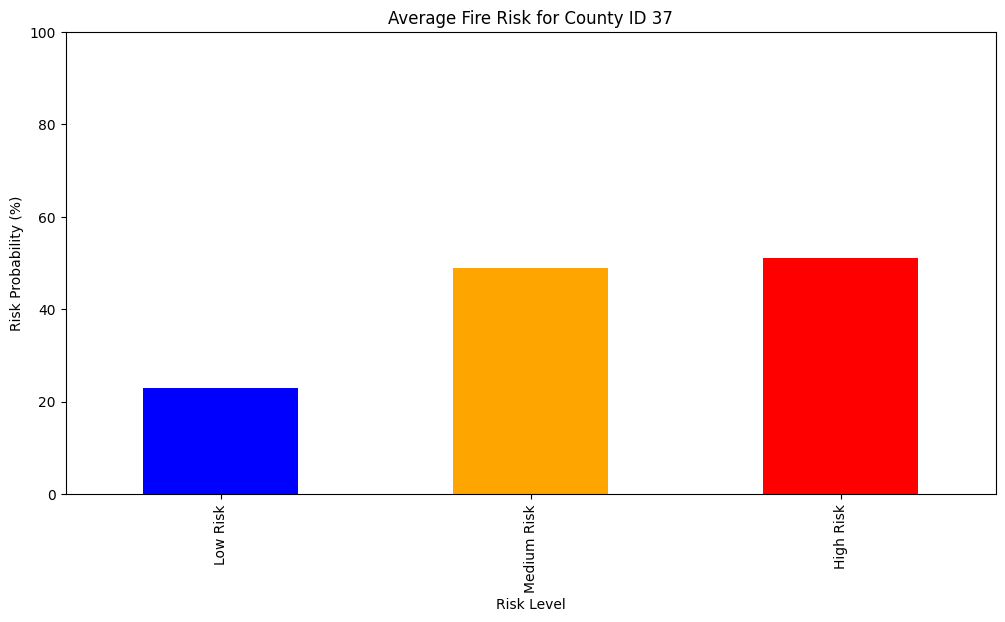

In [16]:
county_ids_input = input('Enter County ID(s) (comma-separated): ')  # Allow user to input multiple IDs as a string
county_ids = list(map(int, county_ids_input.split(',')))  # Convert input to a list of integers
predict_fire_risk(model, data, county_ids)

In [17]:
def clean_numeric_columns(data):
    # Convert columns to numeric and handle errors
    data['CountyIds'] = pd.to_numeric(data['CountyIds'], errors='coerce')
    data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
    data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')

    # Fill missing values with the median or mean for numerical columns
    data['CountyIds'] = data['CountyIds'].fillna(data['CountyIds'].median())
    data['Latitude'] = data['Latitude'].fillna(data['Latitude'].mean())
    data['Longitude'] = data['Longitude'].fillna(data['Longitude'].mean())

    return data

In [19]:
def plot_risk_lines_by_county(model, data):
    # Clean numeric columns and prepare data
    data = clean_numeric_columns(data)

    # Convert CountyIds to numeric if they are not already
    data['CountyIds'] = pd.to_numeric(data['CountyIds'], errors='coerce')

    # Drop rows where CountyIds could not be converted to numeric
    data = data.dropna(subset=['CountyIds'])

    # Check data shape after cleaning
    print(f"Data shape after cleaning: {data.shape}")

    # Select relevant features for prediction
    features = ['Latitude', 'Longitude', 'CountyIds']
    county_data = data[features]

    # Check if county_data is empty
    print(f"County data shape: {county_data.shape}")

    if county_data.empty:
        print("No data left for prediction!")
        return

    # Predict the probability of each class
    probabilities = model.predict_proba(county_data)
    data['High Risk (%)'] = probabilities[:, 1] * 100  # High Risk probability as percentage

    # Calculate average high risk probability for each county
    avg_risk_by_county = data.groupby('CountyIds')['High Risk (%)'].mean().reset_index()

    # Sort counties by County ID
    avg_risk_by_county = avg_risk_by_county.sort_values(by='CountyIds')

    # Define thresholds for Low, Medium, and High risk
    low_risk_threshold = 33
    high_risk_threshold = 66

    # Classify counties into low, medium, and high risk based on thresholds
    low_risk_counties = avg_risk_by_county[avg_risk_by_county['High Risk (%)'] < low_risk_threshold]
    medium_risk_counties = avg_risk_by_county[(avg_risk_by_county['High Risk (%)'] >= low_risk_threshold) &
                                               (avg_risk_by_county['High Risk (%)'] < high_risk_threshold)]
    high_risk_counties = avg_risk_by_county[avg_risk_by_county['High Risk (%)'] >= high_risk_threshold]

    # Generate sequential indices for x-axis (to spread points evenly)
    low_risk_counties['x_index'] = range(len(low_risk_counties))
    medium_risk_counties['x_index'] = range(len(low_risk_counties), len(low_risk_counties) + len(medium_risk_counties))
    high_risk_counties['x_index'] = range(len(low_risk_counties) + len(medium_risk_counties), len(avg_risk_by_county))

    # Define vertical offsets for each risk category to prevent overlap
    low_risk_offset = 0  # Low risk will be at the base level
    medium_risk_offset = 10  # Medium risk will be slightly above low risk
    high_risk_offset = 20  # High risk will be slightly above medium risk

    # Plot
    plt.figure(figsize=(12, 6))

    # Plot line for low risk counties
    plt.plot(low_risk_counties['x_index'], low_risk_counties['High Risk (%)'] + low_risk_offset,
             color='blue', marker='o', label='Low Risk Counties')

    # Plot line for medium risk counties
    plt.plot(medium_risk_counties['x_index'], medium_risk_counties['High Risk (%)'] + medium_risk_offset,
             color='orange', marker='o', label='Medium Risk Counties')

    # Plot line for high risk counties
    plt.plot(high_risk_counties['x_index'], high_risk_counties['High Risk (%)'] + high_risk_offset,
             color='red', marker='o', label='High Risk Counties')

    # Add labels to the points with black color and adjusted position
    label_offset = 0.1  # Horizontal offset for text labels
    for i, row in low_risk_counties.iterrows():
        plt.text(row['x_index'] + label_offset, row['High Risk (%)'] + low_risk_offset,
                 f"{int(row['CountyIds'])}", fontsize=8, color='black', ha='center')
    for i, row in medium_risk_counties.iterrows():
        plt.text(row['x_index'] + label_offset, row['High Risk (%)'] + medium_risk_offset,
                 f"{int(row['CountyIds'])}", fontsize=8, color='black', ha='center')
    for i, row in high_risk_counties.iterrows():
        plt.text(row['x_index'] + label_offset, row['High Risk (%)'] + high_risk_offset,
                 f"{int(row['CountyIds'])}", fontsize=8, color='black', ha='center')

    # Spread x-axis labels evenly based on county count
    plt.xticks(np.concatenate([low_risk_counties['x_index'], medium_risk_counties['x_index'], high_risk_counties['x_index']]),
               np.concatenate([low_risk_counties['CountyIds'], medium_risk_counties['CountyIds'], high_risk_counties['CountyIds']]),
               rotation=90, ha="right")  # Rotate and align labels properly to avoid overlap

    # Label axes and set title
    plt.xlabel('County ID')
    plt.ylabel('High Risk Probability (%)')
    plt.title('Fire Risk by County (Low, Medium, and High)')
    plt.legend()

    # Adjust the layout to fit labels properly
    plt.tight_layout()

    # Show plot
    plt.show()


Data shape after cleaning: (1636, 38)
County data shape: (1636, 3)


<ipython-input-19-b24d042efbdf>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_risk_counties['x_index'] = range(len(low_risk_counties))
<ipython-input-19-b24d042efbdf>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium_risk_counties['x_index'] = range(len(low_risk_counties), len(low_risk_counties) + len(medium_risk_counties))
<ipython-input-19-b24d042efbdf>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

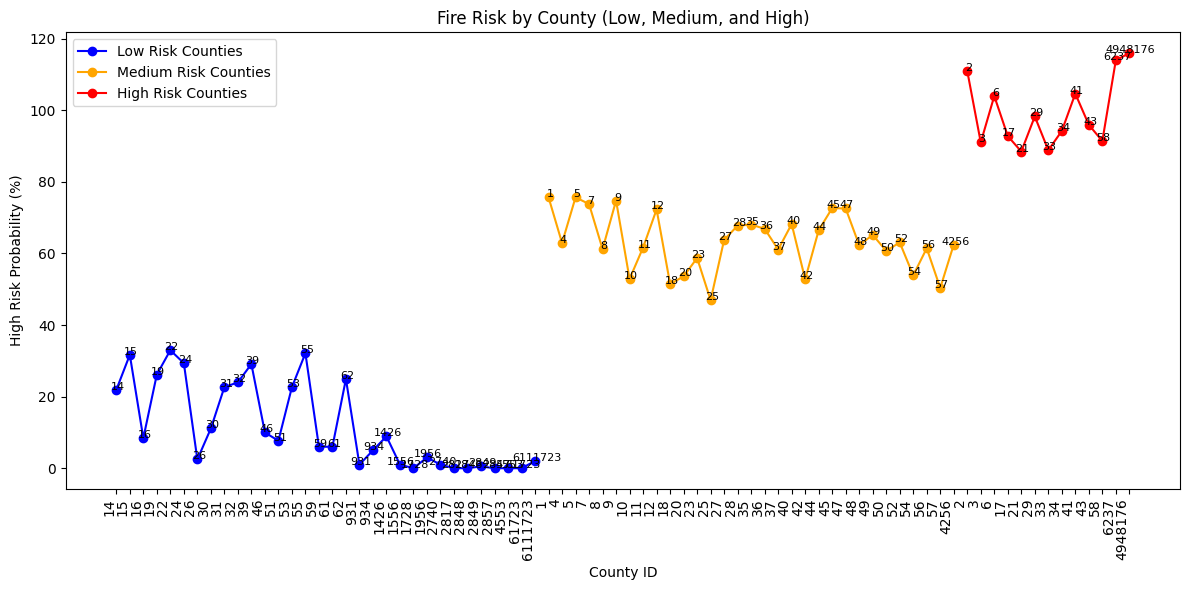

In [20]:
plot_risk_lines_by_county(model, data)

# **LIVE TEMPERATURE MONITORING**

In [64]:
import folium
from folium.plugins import HeatMap
import pandas as pd
from geopy.geocoders import Nominatim
from IPython.display import display, clear_output
import time

In [26]:
data2 = pd.read_csv('/content/drive/MyDrive/California_Temp_Conditions.csv')

In [27]:
data2

,Stn Id,Stn Name,CIMIS Region,Date,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Min Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F)
0,2,FivePoints,San Joaquin Valley,01-01-2018,0.06,0.00,219,7.3,63.4,35.3,47.8,82,46,65.0,36.6,3.3,78.3,51.1
1,2,FivePoints,San Joaquin Valley,01-02-2018,0.04,0.00,127,7.4,59.8,37.7,47.2,80,52,67.0,36.7,3.1,74.5,51.3
2,2,FivePoints,San Joaquin Valley,01-03-2018,0.04,0.00,125,8.4,61.1,37.3,49.9,79,49,68.0,39.9,4.5,107.5,51.3
3,2,FivePoints,San Joaquin Valley,01-04-2018,0.07,0.01,219,11.6,69.2,48.7,56.8,94,52,74.0,48.5,5.8,140.2,53.0
4,2,FivePoints,San Joaquin Valley,01-05-2018,0.07,0.00,239,12.7,73.8,47.5,59.8,94,49,72.0,50.8,4.2,101.4,54.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128120,262,Linden,San Joaquin Valley,9/14/2020,0.14,0.00,420,15.4,84.3,53.7,66.3,95,39,70.0,56.2,3.4,81.7,69.4
128121,262,Linden,San Joaquin Valley,9/15/2020,0.15,0.00,430,15.1,86.8,49.6,66.0,96,31,69.0,55.7,2.7,64.2,69.0
128122,262,Linden,San Joaquin Valley,9/16/2020,0.15,0.00,445,16.2,89.0,53.6,68.0,97,30,69.0,57.6,3.3,78.2,69.0
128123,262,Linden,San Joaquin Valley,9/17/2020,0.16,0.00,447,16.6,88.1,53.3,70.4,97,35,65.0,58.3,3.3,78.1,69.5


In [80]:
# Coordinates for San Joaquin Valley (Approximate center)
lat = 36.7783  # Latitude for San Joaquin Valley
lon = -119.4179  # Longitude for San Joaquin Valley

# Initialize the map centered around San Joaquin Valley
m = folium.Map(location=[lat, lon], zoom_start=14)  # Zoom level of 7 to cover the valley

# Add a marker for San Joaquin Valley
folium.Marker(
    location=[lat, lon],
    popup="San Joaquin Valley",
    icon=folium.Icon(color='blue')
).add_to(m)

# Save map to an HTML file
m.save("san_joaquin_valley_map.html")

# Display the map (works in Jupyter Notebooks or similar environments)
m


In [37]:
# Define the wildfire risk assessment function
def assess_wildfire_risk(row):
    low_precip = row['Precip (in)'] < 0.1
    high_solar_radiation = row['Sol Rad (Ly/day)'] > 400
    high_avg_temp = row['Avg Air Temp (F)'] > 75
    high_max_temp = row['Max Air Temp (F)'] > 85
    low_avg_humidity = row['Avg Rel Hum (%)'] < 30
    low_min_humidity = row['Min Rel Hum (%)'] < 20
    low_dew_point = row['Dew Point (F)'] < 40
    high_wind_speed = row['Avg Wind Speed (mph)'] > 15
    high_wind_run = row['Wind Run (miles)'] > 200

    risk_score = sum([
        low_precip, high_solar_radiation, high_avg_temp, high_max_temp,
        low_avg_humidity, low_min_humidity, low_dew_point,
        high_wind_speed, high_wind_run
    ])

    if risk_score >= 4:
        return 'High Risk'
    elif risk_score >= 2:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

In [86]:
# Initialize geocoder
geolocator = Nominatim(user_agent="wildfire_heatmap")

# Function to get latitude and longitude for a city
def geocode_city(city):
    try:
        location = geolocator.geocode(city)
        if location:
            return location.latitude, location.longitude
    except Exception as e:
        print(f"Error geocoding {city}: {e}")
    return None, None

# Prepare data for heatmap
heat_data = []

# User input for regions
regions_input = input("Enter the region(s) to assess (separate by commas for multiple regions): ").strip()
regions = [region.strip() for region in regions_input.split(',')]

# Flag to check if any region is found
region_found = False

# Process the wildfire risk based on user input for region(s)
for region in regions:
    if region in data2['CIMIS Region'].unique():
        region_found = True
        print(f"\nProcessing wildfire risk for region: {region}")

        # Get all rows corresponding to the current region
        region_data = data2[data2['CIMIS Region'] == region]

        # Re-initialize map to update markers and heatmap in each iteration
        lat, lon = geocode_city(region)
        m = folium.Map(location=[lat, lon], zoom_start=18)

        # Process each row in the region
        for index, row in region_data.iterrows():
            risk = assess_wildfire_risk(row)
            print(f"{index}    {region}     {row['Precip (in)']}    {row['Sol Rad (Ly/day)']}     {row['Avg Air Temp (F)']}   {row['Max Air Temp (F)']}   {row['Avg Rel Hum (%)']}   {row['Min Rel Hum (%)']}  {row['Dew Point (F)']}    {row['Avg Wind Speed (mph)']}     {row['Wind Run (miles)']}     {risk}")

            # Add risk info to DataFrame
            data2.at[index, 'Wildfire Risk'] = risk

            # Collect data for map display (both markers and heatmap)
            lat, lon = geocode_city(row['CIMIS Region'])
            if lat and lon:
                # Add to heatmap data with intensity value (1 for low, 2 for moderate, 3 for high)
                heat_data.append([lat, lon, 1 if risk == 'Low Risk' else (2 if risk == 'Moderate Risk' else 3)])

                # Add marker with popup
                folium.Marker(
                    location=[lat, lon],
                    popup=f"{row['CIMIS Region']} - {risk}",
                    icon=folium.Icon(color='red' if risk == 'High Risk' else 'orange' if risk == 'Moderate Risk' else 'green')
                ).add_to(m)

            # Clear the output and re-display the map to simulate real-time updates
            clear_output(wait=True)
            display(m)

            # Wait to simulate real-time processing (you can adjust or remove this based on your preference)
            time.sleep(1)

        # Add heatmap layer to the map after processing the region
        if heat_data:
            HeatMap(heat_data).add_to(m)

    else:
        print(f"\nRegion '{region}' not found in data!")

# If no region was found, print "No region found"
if not region_found:
    print("\nNo Region Found!")

KeyboardInterrupt: 